In [11]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 

In [12]:
#load the csv file 
episodes = pd.read_csv("house_episodes.csv")
imdb = pd.read_csv("house_imdb.csv")

In [13]:
episodes.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,us_viewers
0,1,1,1,Pilot,Bryan Singer,David Shore,11/16/2004,7050000
1,1,2,2,Paternity,Peter O'Fallon,Lawrence Kaplow,11/23/2004,6090000
2,1,3,3,Occam's Razor,Bryan Singer,David Shore,11/30/2004,6330000
3,1,4,4,Maternity,Newton Thomas Sigel,Peter Blake,12/7/2004,6740000
4,1,5,5,Damned If You Do,Greg Yaitanes,Sara B. Cooper,12/14/2004,6910000


In [14]:
episodes.shape

(177, 8)

In [15]:
imdb.head()

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1.0,Pilot,16 Nov. 2004,8.6,4987.0,Young kindergarten teacher Rebecca Adler colla...
1,1,2.0,Paternity,23 Nov. 2004,8.2,3595.0,The team helps a high school boy (16) who has ...
2,1,3.0,Occam's Razor,30 Nov. 2004,8.2,3381.0,A college boy whose low blood pressure does no...
3,1,4.0,Maternity,7 Dec. 2004,8.4,3276.0,A nightmare scenario hits Princeton Plainsboro...
4,1,5.0,Damned If You Do,14 Dec. 2004,8.2,3158.0,A nun suffering from acute dermatitis and asth...


In [16]:
imdb.shape

(177, 7)

In [17]:
# join the house_episodes to house_imdb using the merge() method on the title column 
# you can also chnage the indexing 
house_rating = episodes.merge(imdb, on='title', how='left')

In [18]:
house_rating.shape

(177, 14)

In [19]:
#check for null values in the dataframe using .isna().all()
house_rating.isna().all()

season_x                 False
episode_num_in_season    False
episode_num_overall      False
title                    False
directed_by              False
written_by               False
original_air_date_x      False
us_viewers               False
season_y                 False
episode_num              False
original_air_date_y      False
imdb_rating              False
total_votes              False
desc                     False
dtype: bool

In [20]:
#select the columns of interest 
house_rating = house_rating[['season_x','episode_num_in_season','original_air_date_x','title','directed_by','written_by', \
                            'us_viewers','imdb_rating','total_votes']]

In [21]:
house_rating.describe()

,season_x,episode_num_in_season,us_viewers,imdb_rating,total_votes
count,177.000000,177.000000,1.770000e+02,177.000000,177.000000
mean,4.491525,11.700565,1.391695e+07,8.502825,2675.079096
std,2.318695,6.602827,5.089274e+06,0.465568,1182.495298
min,1.000000,1.000000,5.610000e+06,7.400000,1693.000000
25%,2.000000,6.000000,1.041000e+07,8.100000,2060.000000
50%,5.000000,12.000000,1.337000e+07,8.500000,2424.000000
75%,7.000000,17.000000,1.714000e+07,8.800000,2786.000000
max,8.000000,24.000000,2.904000e+07,9.800000,9318.000000


In [22]:
house_rating.head()

,season_x,episode_num_in_season,original_air_date_x,title,directed_by,written_by,us_viewers,imdb_rating,total_votes
0,1,1,11/16/2004,Pilot,Bryan Singer,David Shore,7050000,8.6,4987.0
1,1,2,11/23/2004,Paternity,Peter O'Fallon,Lawrence Kaplow,6090000,8.2,3595.0
2,1,3,11/30/2004,Occam's Razor,Bryan Singer,David Shore,6330000,8.2,3381.0
3,1,4,12/7/2004,Maternity,Newton Thomas Sigel,Peter Blake,6740000,8.4,3276.0
4,1,5,12/14/2004,Damned If You Do,Greg Yaitanes,Sara B. Cooper,6910000,8.2,3158.0


In [23]:
#get the number of dstinct writers using groupby usinf . you can unpivot the written_by column to get to get distinct values for each writer
writers = house_rating.groupby('written_by').agg(pd.Series.nunique).count()
print(writers)

season_x                 75
episode_num_in_season    75
original_air_date_x      75
title                    75
directed_by              75
us_viewers               75
imdb_rating              75
total_votes              75
dtype: int64


In [24]:
# group house_raating by 'written_by' column 
writers = house_rating.groupby('written_by').agg(pd.Series.nunique)
#count distinct writers

In [25]:
#sort descending the values by number of times it appears in episodes
write = writers.sort_values(by= 'episode_num_in_season', ascending =False)

In [26]:
write.head()

,season_x,episode_num_in_season,original_air_date_x,title,directed_by,us_viewers,imdb_rating,total_votes
written_by,,,,,,,,
Peter Blake,7,9,12,12,9,12,8.0,12.0
Doris Egan,5,8,8,8,7,8,6.0,8.0
Thomas L. Moran,6,8,10,10,6,10,6.0,10.0
David Hoselton,6,8,9,9,6,9,8.0,9.0
Lawrence Kaplow,5,7,8,8,8,8,7.0,8.0


In [27]:
write.tail()

,season_x,episode_num_in_season,original_air_date_x,title,directed_by,us_viewers,imdb_rating,total_votes
written_by,,,,,,,,
Pamela Davis & Leonard Dick,1,1,1,1,1,1,1.0,1.0
Peter Blake & Eli Attie,1,1,1,1,1,1,1.0,1.0
Peter Blake & Sara Hess,1,1,1,1,1,1,1.0,1.0
"Peter Blake, David Foster, Russel Friend & Garrett Lerner",1,1,1,1,1,1,1.0,1.0
Carol Green & Dustin Paddock,1,1,1,1,1,1,1.0,1.0


In [28]:
#cheeck suggestions for writers 
Directors = house_rating.groupby('directed_by').agg(pd.Series.nunique).count()
print(Directors)

season_x                 50
episode_num_in_season    50
original_air_date_x      50
title                    50
written_by               50
us_viewers               50
imdb_rating              50
total_votes              50
dtype: int64


In [29]:
Directors = house_rating.groupby('directed_by').agg(pd.Series.nunique)

In [30]:
director = Directors.sort_values(by= 'episode_num_in_season', ascending =False)

In [31]:
director.head()

,season_x,episode_num_in_season,original_air_date_x,title,written_by,us_viewers,imdb_rating,total_votes
directed_by,,,,,,,,
Greg Yaitanes,7,18,30,30,21,30,15.0,30.0
Deran Sarafian,5,14,22,22,16,21,13.0,22.0
David Straiton,6,12,16,16,12,16,8.0,16.0
Dan Attias,6,7,8,8,8,8,7.0,8.0
Daniel Sackheim,3,7,7,7,6,7,5.0,7.0


In [32]:
#you can join the table to itself and compare how many writers are directors 
# you can unpivot both columns using .melt to count distinct writers and directors 
# you can also check the relationship betweent the three last columns and writers & directors whrn they worked alone vs colaborated

In [33]:
# get rating greater than 9.0 using .query
rating = house_rating.query('imdb_rating > 9.2')
top_rating = rating.sort_values(by=['imdb_rating'], ascending=False)
top_rating.head()

,season_x,episode_num_in_season,original_air_date_x,title,directed_by,written_by,us_viewers,imdb_rating,total_votes
84,4,15,5/12/2008,House's Head,Greg Yaitanes,Story by: Doris EganTeleplay by: Peter Blake &...,14840000,9.8,9318.0
85,4,16,5/19/2008,Wilson's Heart,Katie Jacobs,"Peter Blake, David Foster, Russel Friend & Gar...",16160000,9.8,8768.0
110,6,1,9/21/2009,Broken,Katie Jacobs,Russel Friend & Garrett Lerner & David Foster ...,15760000,9.7,8376.0
111,6,2,9/21/2009,Broken,Katie Jacobs,Russel Friend & Garrett Lerner & David Foster ...,15760000,9.7,8376.0
20,1,21,5/17/2005,Three Stories,Paris Barclay,David Shore,17680000,9.6,7221.0


In [34]:
#highest US_viewers select the viewers colunm and sort descending 
us_view = rating.sort_values(by=['us_viewers'], ascending=False)
us_view.head()

,season_x,episode_num_in_season,original_air_date_x,title,directed_by,written_by,us_viewers,imdb_rating,total_votes
45,2,24,5/23/2006,No Reason,David Shore,Story by: Lawrence Kaplow & David ShoreTelepla...,25470000,9.5,4835.0
20,1,21,5/17/2005,Three Stories,Paris Barclay,David Shore,17680000,9.6,7221.0
42,2,21,5/3/2006,Euphoria: Part 2,Deran Sarafian,Russel Friend & Garrett Lerner & David Shore,17160000,9.3,3642.0
85,4,16,5/19/2008,Wilson's Heart,Katie Jacobs,"Peter Blake, David Foster, Russel Friend & Gar...",16160000,9.8,8768.0
110,6,1,9/21/2009,Broken,Katie Jacobs,Russel Friend & Garrett Lerner & David Foster ...,15760000,9.7,8376.0


In [35]:
#top 20 votes
top_votes = house_rating.sort_values(by=['total_votes'], ascending=False)
top_votes.head()

,season_x,episode_num_in_season,original_air_date_x,title,directed_by,written_by,us_viewers,imdb_rating,total_votes
84,4,15,5/12/2008,House's Head,Greg Yaitanes,Story by: Doris EganTeleplay by: Peter Blake &...,14840000,9.8,9318.0
85,4,16,5/19/2008,Wilson's Heart,Katie Jacobs,"Peter Blake, David Foster, Russel Friend & Gar...",16160000,9.8,8768.0
111,6,2,9/21/2009,Broken,Katie Jacobs,Russel Friend & Garrett Lerner & David Foster ...,15760000,9.7,8376.0
110,6,1,9/21/2009,Broken,Katie Jacobs,Russel Friend & Garrett Lerner & David Foster ...,15760000,9.7,8376.0
20,1,21,5/17/2005,Three Stories,Paris Barclay,David Shore,17680000,9.6,7221.0


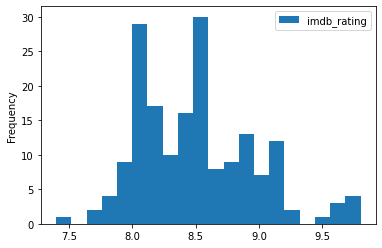

In [36]:
house_rating.plot(x='season_x', y='imdb_rating',kind='hist', bins=20)
plt.show()

In [37]:
house_rating.corr()

,season_x,episode_num_in_season,us_viewers,imdb_rating,total_votes
season_x,1.000000,-0.011486,-0.595548,-0.118666,-0.252623
episode_num_in_season,-0.011486,1.000000,0.202060,0.149066,0.031004
us_viewers,-0.595548,0.202060,1.000000,0.228303,0.179287
imdb_rating,-0.118666,0.149066,0.228303,1.000000,0.718410
total_votes,-0.252623,0.031004,0.179287,0.718410,1.000000


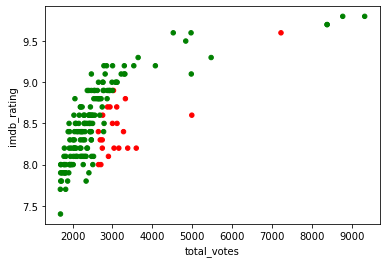

In [38]:
is_season= [ 'r' if s==1  else 'g' for s in house_rating['season_x']]
house_rating.plot(x='total_votes', y='imdb_rating',kind='scatter', color =is_season)
plt.show()

In [39]:
#feel free to build on this code
#i would like to add more colors to the scatter plot 
#create a line plot for years and average views, rating and votes